# Hyperparameters

Hyperparameters

## Import libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

## Prepare the dataset

In [37]:
# Loading the dataset
DATA_DIR = '../_data'
FILE_NAME = '04_2017_bike_data.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
bike = pd.read_csv(data_path, index_col=None, thousands=',')

# 'T' is for trace amount of rain
bike['rain_amt'] = bike['rain_amt'] \
.replace('0', 0.0) \
.replace('T', 0.001) \
.replace(',', '', regex=True).astype(float)

# Convert date to actual date time
bike['date'] = pd.to_datetime(bike['date'] + ' 2017')

bike.head()

,date,day,temp_high,temp_low,rain_amt,brooklyn_bridge,manhattan_bridge,williamsburg_bridge,queensboro_bridge,total_cyclists,Unnamed: 10
0,2017-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,NaN
1,2017-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,NaN
2,2017-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,NaN
3,2017-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,NaN
4,2017-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,NaN


## Split and standardize the dataset

In [38]:
# prepare features (X - input variables) and the target (y) variable
numerical_features = ['temp_high', 'temp_low', 'rain_amt']

X = bike[numerical_features]
y = bike['total_cyclists']

# 90-10 split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])

X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

X_train[numerical_features].head()

,temp_high,temp_low,rain_amt
26,0.322301,1.110996,-0.413021
8,0.132091,-0.914843,-0.413021
27,1.739371,0.951823,-0.413021
12,-0.058120,-0.350502,-0.413021
21,-0.828473,0.098076,-0.019226


## Optimizing a single hyperparameter

In [55]:
# Define the model and specify the hyperparameter to optimize
# Define the KNeighborsRegressor model
model = KNeighborsRegressor()

# Define the hyperparameter to optimize (e.g., n_neighbors)
hyperparameter = "n_neighbors"

best_mae = float("inf")  # Initialize the best mean absolute error (MAE) with a large value
best_hyperparam_value = None  # Initialize the best hyperparameter value

mae_values = []  # List to store the MAE values

# Iterate over different hyperparameter values and select the one with the lowest MAE
for param_value in range(1, 27):  # Example range for K from 1 to 27
    # Set the current hyperparameter value
    setattr(model, hyperparameter, param_value)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Check if the current MAE is the best so far
    if mae < best_mae:
        best_mae = mae
        best_hyperparam_value = param_value
        
    # Append the MAE value to the list
    mae_values.append(mae)


# Print the best hyperparameter value and its corresponding MAE
print(f"Best {hyperparameter}: {best_hyperparam_value}")
print(f"Best MAE: {best_mae}")


Best n_neighbors: 26
Best MAE: 5816.961538461539


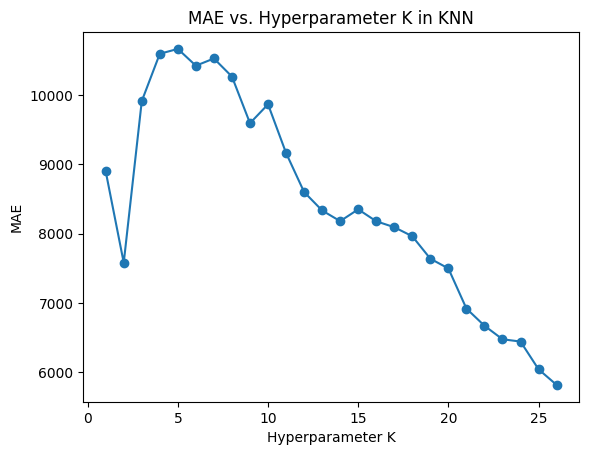

In [56]:
# Plot the MAE values against the corresponding K values
# Plot the MAE values
plt.plot(range(1, 27), mae_values, marker='o')

# Set the labels and title
plt.xlabel('Hyperparameter K')
plt.ylabel('MAE')
plt.title('MAE vs. Hyperparameter K in KNN')

# Show the plot
plt.show()


In [50]:
# Define the model and specify the hyperparameter to optimize
# Define the RandomForestRegressor model
model = RandomForestRegressor(random_state=123)

# Define the hyperparameter to optimize (e.g., n_estimators)
hyperparameter = "n_estimators"

best_mae = float("inf")  # Initialize the best mean absolute error (MAE) with a large value
best_hyperparam_value = None  # Initialize the best hyperparameter value

mae_values = []  # List to store the MAE values

# Iterate over different hyperparameter values and select the one with the lowest MAE
for param_value in range(1, 30):  # Example range for n_estimators from 1 to 30
    # Set the current hyperparameter value
    setattr(model, hyperparameter, param_value)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Check if the current MAE is the best so far
    if mae < best_mae:
        best_mae = mae
        best_hyperparam_value = param_value
        
    # Append the MAE value to the list
    mae_values.append(mae)

# Print the best hyperparameter value and its corresponding MAE
print(f"Best {hyperparameter}: {best_hyperparam_value}")
print(f"Best MAE: {best_mae}")


Best n_estimators: 28
Best MAE: 5699.25


## Optimizing for more than one parameter

In [57]:
# Define the model and specify the hyperparameter to optimize
# Define the RandomForestRegressor model
model = RandomForestRegressor(random_state=123)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': [2, 4, 6],
    'n_estimators': [50, 100, 150]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

# Get the best hyperparameters and corresponding MAE
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best MAE:", best_mae)


Best Hyperparameters: {'max_depth': 5, 'max_features': 2, 'n_estimators': 150}
Best MAE: 3088.2275038529365
